<a href="https://colab.research.google.com/github/Um-king/orm/blob/main/%5B%EB%AA%A8%EB%91%90%EC%97%B0%5D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 텐서플로 기초

## 1. 텐서 생성

In [1]:
import tensorflow as tf

In [2]:
# 1. 텐서 생성

# 상수로 텐서 만들기
a = tf.constant([1, 2, 3]) # constant(리스트) -> 상수로 1차원 텐서 생성

# 0으로 채워진 텐서 만들기
b = tf.zeros([3, 3]) # zeros([행,렬] 정보) -> 3*3 행과 열, 0으로 채워진 2차원 텐서 생성

In [3]:
print(a) # 1차원 텐서 출력 -> (3, 빈칸)으로 출력
print(b) # 2차원 텐서 출력 -> 3*3 행렬

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


## 2. 산술 연산

In [4]:
# 2. 산술 연산

x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])

# 덧셈
z = x + y

# 곱셈
w = x * y

print(z) # 같은 행,열의 위치에 값을 연산
print(w)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


## 3. 텐서 형태 변경

In [6]:
x = tf.constant([[1, 2], [3, 4]])

# 형태를 [4]로 변경
y = tf.reshape(x, [4]) # 변경할 데이터, 변경할 형태(4, )

# 2차원 텐서를 1차원 텐서로 변경
print(x)
print(y)

# 2차원 배열로 되어있던 것을 reshape()을 통해 1차원 배열로

# 이게 왜 중요한가?
# pandas에서 series로 변환을 해서 연산을 했다.
# Tensorflow로 작업을 하더라도 x차원의 배열들을 1차원으로 바꿔서 연산을 하게 된다. -> 딥러닝도 연산을 할때 동일하게 작업(1차원 형태로 풀어서 연산을 한다.)
# 1차원 형태로 연산한 후에 다시 reshape()을 통해 원래의 형태로 돌아간다.

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


# 간단한 신경망 만들기
- 선형회귀를 딥러닝으로 구현
- 입력 데이터와 출력 데이터의 관계를 학습하여 파악한다.
- 비록 작은 오차가 있지만, 이제 이 간단한 Neural Network는 어떤 입력 x에 대해서 대략 2x - 1를 출력하도록 훈련되었습니다.

## 1. Neural Network 구성하기

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# units는 뉴런 또는 출력 노드의 개수를 의미
# input_shape 입력데이터의 형태를 결정 : 만약 데이터의 변수가 10개면 ->  input_shape도 10개로 설정해야한다. input_shape = [10], 데이터의 변ㅅ수가 2*2사진이라면 input_shape = [2*2]
# Sequential 많으면 많을 수록 여러 층으로 되어있다. -> 뉴런 네트워크의 각 층을 순서대로 쌓을 수 있도록 한다.
# Dense는 완전 연결된 하나의 뉴런층을 구현한다.
# units = 1 출력 노드의 개수를 설정했고, input_shape=[1] 입력데이터의 개수를 설정-> input과 output을 하나씩 만들었다.

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])  # -> 이 작업이 머신러닝에서 모델을 선택하는것과 같다

# units : 출력 값 개수를 설정 -> 몇개를 출력 값으로 보여줄 것인지
# input_shape : 입력 값의 개수 설정 -> 몇개를 입력할 것인지

In [8]:
model

## 2. Neural Network 컴파일하기

In [12]:
# 머신러닝에서 모델의 옵션 설정과 같다

# loss -> 손실함수 : 예측이 얼마나 잘 맞는지 측정하는 역할
# optimizer -> 더 개선된 예측값을 출력하도록 최적화하는 알고리즘
model.compile(loss='mean_squared_error', optimizer='sgd')

# 손실 함수 (Loss function)는 Neural Network의 예측이 얼마나 잘 맞는지 측정하는 역할을 합니다.
# 손실 함수로부터 얻어진 손실값 (Loss value)은 훈련 과정에서 Neural Network가 얼마나 잘 훈련되었는지 확인하는 지표가 됩니다.

## 3. Neural Network 훈련하기

In [13]:
# 입력값과 출력값을 확인하여 해당 입력 값으로 어떻게 저런 출력이 되었는지 스스로 학습하고 식을 생성한다.
# 입력 데이터와 출력 데이터의 관계를 학습하여 파악한다.

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)  # 입력데이터
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float) # 출력데이터

# 에포크 (epoch)는 주어진 데이터를 한 번 훈련하는 단위  -> 한번 훈련할때 500번 수행
# 입력데이터와 출력데이터를 할당하여 해당 데이터들로 학습을 진행 -> 입력과 출력 데이터를 통해 loss가 최적이 될 때까지 학습한다.
model.fit(xs, ys, epochs=500) # loss가 거의 안남게 될때까지 학습

Epoch 1/500
1/1 [==============================] - 0s 480ms/step - loss: 30.5543
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 24.3540
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 19.4694
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 15.6201
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 12.5854
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 10.1918
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 8.3026
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 6.8105
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 5.6308
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 4.6972
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 3.9571
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 3.3695
Epoch 13/500
1/1 [===========================

## 4. Neural Network 예측하기

In [14]:
# 5를 입력할때 출력으로 8.994206을 예측

pred = model.predict([5.0])
print(pred)

# 비록 작은 오차가 있지만, 이제 이 간단한 Neural Network는 어떤 입력 x에 대해서 대략 2x - 1를 출력하도록 훈련되었습니다.

1/1 [==============================] - 0s 116ms/step
[[8.994206]]


# 입력 1개, 출력 3개인 딥러닝 모델(손실함수)

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])]) # 입력(input_shape)은 1개고 출력(units)은 3개인 모델 생성

In [16]:
# mse는 Mean Squared Error의 줄임말이며 아래의 수식을 이용해서 평균 제곱 오차를 계산하는 방식
model.compile(loss='mse')

In [17]:
# 예측
# 임의로 생성된 모델의 가중치 값 (weights)이 있지만, 입력이 0이므로 예측값도 모두 0을 출력
pred = model.predict([0]) # [0] -> 입력값 : 0 / 반환 [0, 0, 0] -> 출력값
print(pred)

1/1 [==============================] - 0s 69ms/step
[[0. 0. 0.]]


In [18]:
# 손실 계산하기

# evaluate() 메서드를 호출하면 손실 값 (loss)을 출력합니다.
# 모델의 손실 함수를 Mean Squared Error로 지정했기 때문에, 손실 값 0.3333은 아래와 같이 계산된 결과입니다.

model.evaluate([0], [[0, 1, 0]])

1/1 [==============================] - 0s 317ms/step - loss: 0.3333


0.3333333432674408

# 옵티마이저
- 손실 함수을 통해 얻은 손실값으로부터 모델을 업데이트하는 방식을 의미

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

In [20]:
# 옵티마이저 -> SGD 설정
model.compile(loss='mse', optimizer='SGD')

In [21]:
model.fit([1], [[0, 1, 0]], epochs=1) # epochs=1 -> 1번만 수행하도록 설정 ==> 훈련 과정을 1번만 수행하도록
model.evaluate([1], [[0, 1, 0]])

1/1 [==============================] - 0s 195ms/step - loss: 1.7606


1.760649561882019

In [22]:
# 100회 훈련 과정의 훈련 시간과 손실값이 출력

history = model.fit([1], [[0, 1, 0]], epochs=100) # 백번 수행하도록 설정

# 계속해서 loss 줄여나가는 걸 볼 수 있고, loss값이 0에 가깝게 학습된걸 확인할 수 있다.
# 100회에 대한 훈련을 진행했고 100회 훈련에 대한 손실값을 확인

Epoch 1/100
1/1 [==============================] - 0s 12ms/step - loss: 1.7606
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 1.7140
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 1.6686
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 1.6244
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 1.5814
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 1.5395
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 1.4987
Epoch 8/100
1/1 [==============================] - 0s 38ms/step - loss: 1.4590
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 1.4204
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 1.3827
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 1.3461
Epoch 12/100
1/1 [==============================] - 0s 31ms/step - loss: 1.3105
Epoch 13/100
1/1 [==============================]

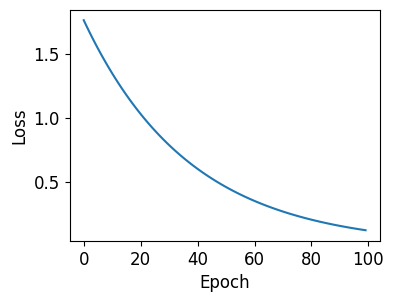

In [23]:
# 손실값 시각화하기
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

1/1 [==============================] - 0s 64ms/step
[[-0.77667964  0.6705109  -0.03598082]]
[array([[-0.77667964,  0.6705109 , -0.03598082]], dtype=float32)]


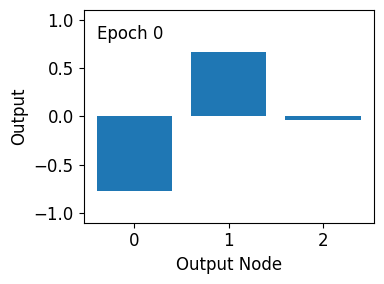

1/1 [==============================] - 0s 38ms/step


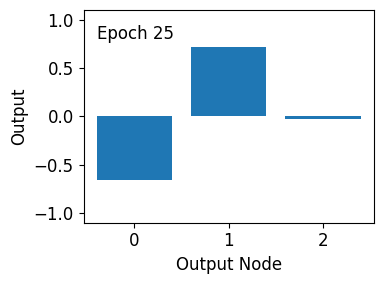

1/1 [==============================] - 0s 37ms/step


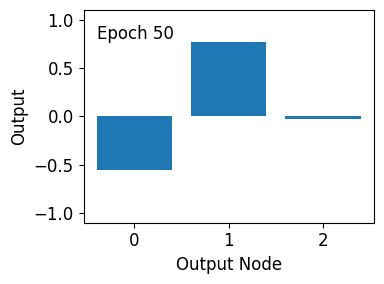

1/1 [==============================] - 0s 96ms/step


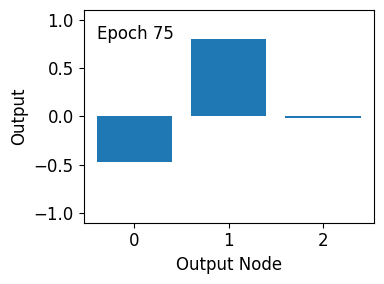

1/1 [==============================] - 0s 42ms/step


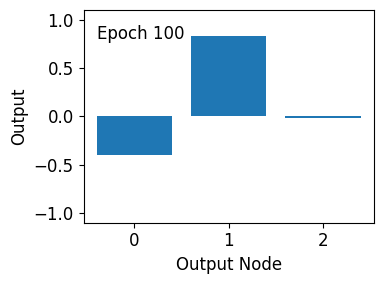

1/1 [==============================] - 0s 57ms/step


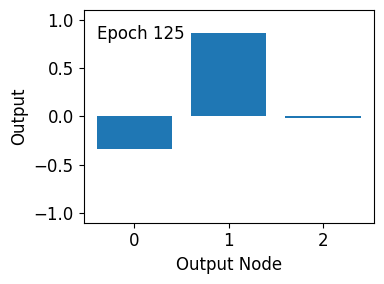

1/1 [==============================] - 0s 43ms/step


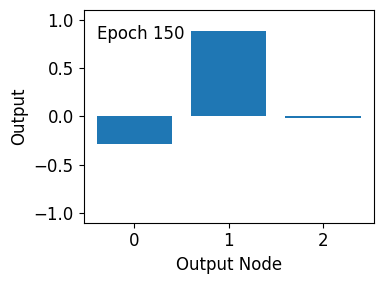

1/1 [==============================] - 0s 41ms/step


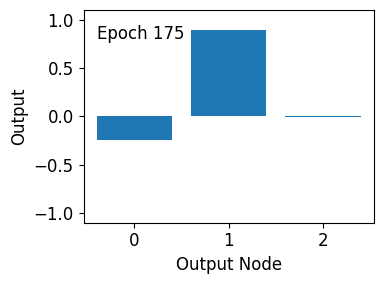

1/1 [==============================] - 0s 81ms/step


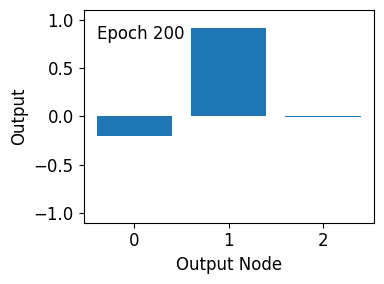

1/1 [==============================] - 0s 36ms/step


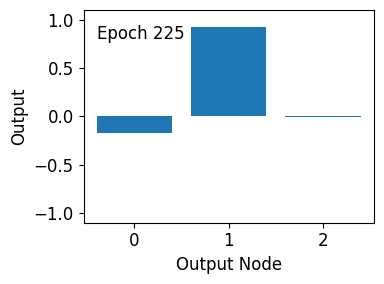

1/1 [==============================] - 0s 41ms/step


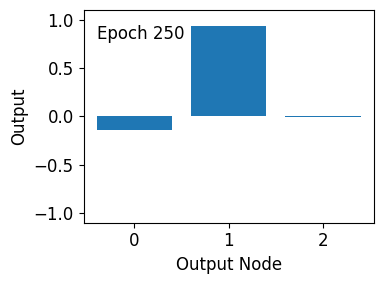

1/1 [==============================] - 0s 38ms/step


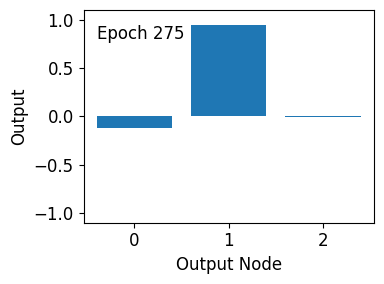

1/1 [==============================] - 0s 35ms/step


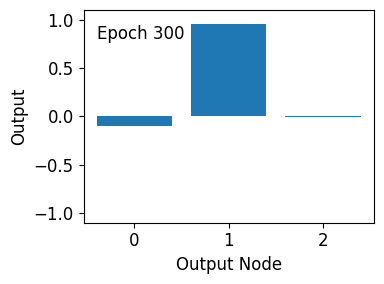

1/1 [==============================] - 0s 40ms/step


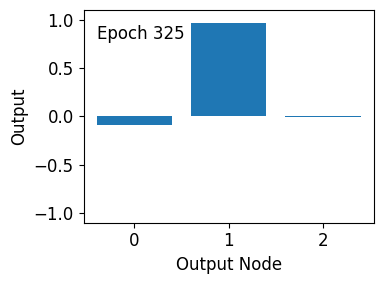

1/1 [==============================] - 0s 37ms/step


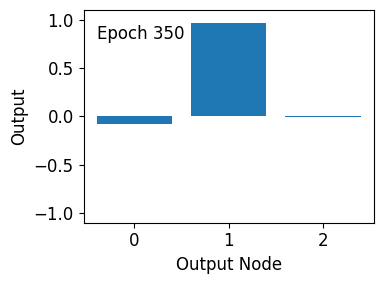

1/1 [==============================] - 0s 58ms/step


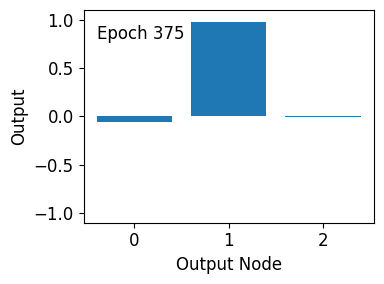

1/1 [==============================] - 0s 39ms/step


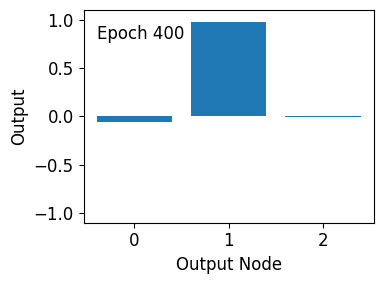

1/1 [==============================] - 0s 63ms/step


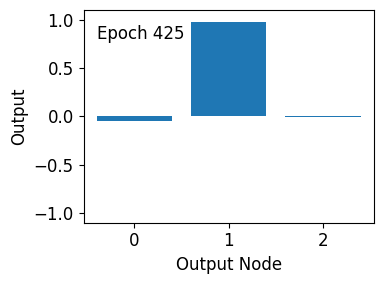

1/1 [==============================] - 0s 38ms/step


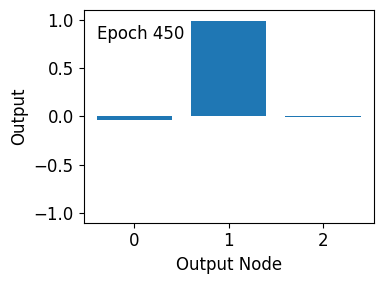

1/1 [==============================] - 0s 37ms/step


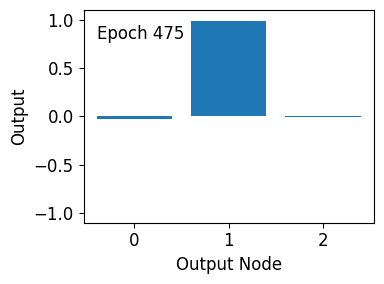

1/1 [==============================] - 0s 39ms/step


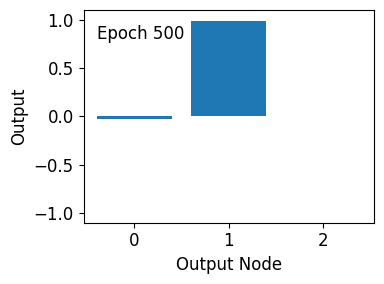

[[-0.02739974  0.9883761  -0.00126933]]
[array([[-0.02739974,  0.9883761 , -0.00126933]], dtype=float32)]


<Figure size 400x300 with 0 Axes>

In [24]:
# 출력값 시각화하기 -> 학습하는 과정을 그래프로 확인할 수 있다.
# 500회의 에포크 동안 훈련에 의해 출력값이 변화하는 과정을 시각화

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

# Modify the code to display the plots directly

# Initialize the model
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1], use_bias=False)])
model.compile(loss='mse', optimizer='SGD')

# Initial prediction and plot
pred = model.predict([1])
print(pred)
print(model.get_weights())

plt.bar(np.arange(3), pred[0])
plt.ylim(-1.1, 1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
plt.show()  # Display the plot
plt.clf()  # Clear the figure

# Training and plotting at intervals
epochs = 500
for i in range(1, epochs+1):
    model.fit([1], [[0, 1, 0]], epochs=1, verbose=0)
    pred = model.predict([1])

    if i % 25 == 0:
        plt.bar(np.arange(3), pred[0])
        plt.ylim(-1.1, 1.1)
        plt.xlabel('Output Node')
        plt.ylabel('Output')
        plt.text(-0.4, 0.8, 'Epoch ' + str(i))
        plt.tight_layout()
        plt.show()  # Display the plot
        plt.clf()  # Clear the figure

# Print final predictions and weights
print(pred)
print(model.get_weights())

# 이미지 분석(해당 이미지가 어떤 숫자인지 파악)

In [25]:
# 환경 설정

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

왜 255로 나눌까?

1. **안정적인 학습**: 이미지의 픽셀 값이 크면, 컴퓨터는 이 값을 처리하는 데 어려움을 겪을 수 있습니다. 0과 1 사이의 값으로 바꾸면 컴퓨터가 더 쉽게 데이터를 학습할 수 있어요.
2. **빠른 학습**: 작은 값으로 데이터를 바꾸면, 컴퓨터는 학습하는 속도가 빨라집니다.
3. **계산 문제 방지**: 큰 숫자를 계속 계산하다 보면 컴퓨터가 계산에 틀릴 확률이 높아집니다. 작은 값으로 바꾸면 이런 문제를 줄일 수 있어요.
4. **더 좋은 결과**: 픽셀 값을 0과 1 사이로 바꾸면, 컴퓨터가 이미지를 더 잘 인식하고, 더 좋은 결과를 얻을 수 있습니다.

간단히 말해서, 이미지의 픽셀 값을 0과 1 사이로 바꾸는 것은 컴퓨터가 이미지를 더 잘 이해하고 빠르게 학습하게 만드는 방법입니다!

In [26]:
# 데이터 호출

# 이미지의 각각의 숫자들의 픽셀(RGB) 값을 0과 1사이의 숫자로 수정
# 숫자가 커지는것을 방지하기 위해 0~1 사이의 숫자로 각각 픽셀의 값을 변경한다

(x_train, y_train), (x_test, y_test) = mnist.load_data() # 데이터를 불러온다. -> mnist의 숫자 이미지를 가져온다.
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [27]:
# 모델 구성

# flatten: 행렬로 되어있는 형태를 1차원으로 수정하는 작업 -> 컴퓨터가 처리하기 쉽게 만들기 위해서
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 1. 28*28의 행렬을 1차원으로 변환 # 입력레이어 -> 2차원에서 1차원으로 변환
    Dense(128, activation='relu'),  # 2. relu라는 옵티마이저를 통해서 128개의 은닉층으로 구성된 은닉레이어를 생성
    Dense(10, activation='softmax') # 3. 출력레이어를 설정했으며 softmax 옵티마이저를 사용하여 출력레이어 생성 -> 0~9까지의 숫자를 예측하는 것
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
# 모델 컴파일
model.compile(optimizer='adam',                         # 학습방법 - 옵티마이저는 아담을 설정
              loss='sparse_categorical_crossentropy',   # 다중 분류할때 sparse_categorical_crossentropy를 주로 사용
              metrics=['accuracy'])                     # 정확도


In [29]:
# 모델 실행

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# epochs=5 -> 5번 훈련을 하겠다.
# 컴퓨터의 램은 8의 배수, 4의배수로 구성되어있고 배치사이즈는 해당 배수로 설정하는게 성능이 가장 좋다 -> batch_size=32 따라서 배치사이즈가 32

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2559 - accuracy: 0.9271 - val_loss: 0.1367 - val_accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1136 - accuracy: 0.9666 - val_loss: 0.1100 - val_accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0773 - accuracy: 0.9768 - val_loss: 0.0957 - val_accuracy: 0.9714
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0790 - val_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0780 - val_accuracy: 0.9764


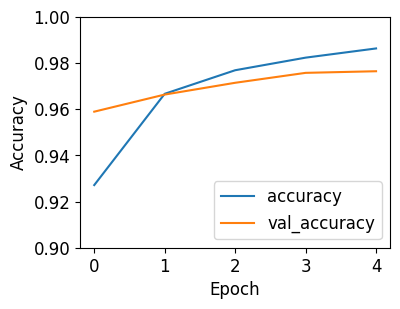

In [32]:
# 결과 확인
# 훈련과 검증의 정확도와 손실을 확인

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1]) # y값 설정
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step


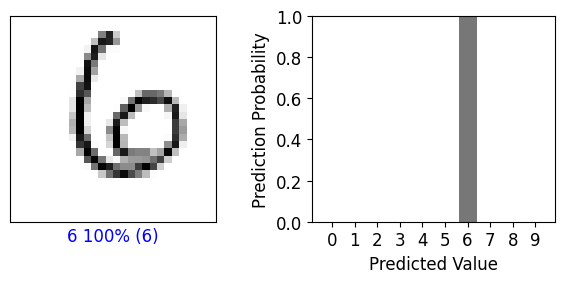

In [31]:
#결과 시각화 정리
import numpy as np

# 테스트 데이터를 사용하여 예측 수행
predictions = model.predict(x_test)

def display_prediction(index, predictions_array, true_label, img):
    plt.figure(figsize=(6,3))

    # 이미지 출력
    plt.subplot(1, 2, 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[index], cmap=plt.cm.binary)

    # 예측 결과 출력
    predicted_label = np.argmax(predictions_array[index])
    if predicted_label == true_label[index]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array[index]),
                                         true_label[index]),
                                         color=color)

    # 예측 확률 막대그래프 출력
    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions_array[index], color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10))
    plt.ylabel('Prediction Probability')
    plt.xlabel('Predicted Value')

    plt.tight_layout()
    plt.show()

# 첫 번째 예측 결과 시각화
display_prediction(100, predictions, y_test, x_test)

# 두 번째 예측 결과 시각화 (실제로 코드를 실행할 수 있다면 이 부분을 주석 해제하여 실행하세요)
# display_prediction(1, predictions, y_test, x_test)

# 해당 숫자의 이미지가 어떤 값으로 예측이 되었는지 확인
# 블랙박스로 내부 작업을 확인할 수 없으므로 결과를 확인하는 방법